In [2]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_path = Path("outputs/Fires_2022.csv")
df_2022 = pd.read_csv(csv_path)

df_2022

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2022,8/5/2022,9/6/2022,14,11464.900000,Unknown / Unidentified
1,2022,8/5/2022,9/9/2022,14,30132.850000,Unknown / Unidentified
2,2022,5/24/2022,5/24/2022,14,29.846780,Unknown / Unidentified
3,2022,6/13/2022,6/19/2022,14,589.867100,Unknown / Unidentified
4,2022,6/3/2022,6/3/2022,7,28.684880,Arson
...,...,...,...,...,...,...
301,2022,7/25/2022,7/25/2022,10,134.469800,Vehicle
302,2022,10/25/2022,10/25/2022,4,98.259120,Campfire
303,2022,5/26/2022,6/5/2022,14,5856.573000,Unknown / Unidentified
304,2022,8/4/2022,8/4/2022,14,4.185538,Unknown / Unidentified


In [4]:
# Convert 'Alarm Date' to datetime
df_2022['Alarm Date'] = pd.to_datetime(df_2022['Alarm Date'])

# Extract month name
df_2022['Month'] = df_2022['Alarm Date'].dt.strftime('%B')

# Group by month and calculate the number of incidents and total acres burned
monthly_summary_2022 = df_2022.groupby('Month').agg({
    'Alarm Date': 'count',
    'GIS Calculated Acres': 'sum'
}).rename(columns={'Alarm Date': 'Number of Incidents', 'GIS Calculated Acres': 'Total Acres Burned'}).reset_index()

# To ensure the months are in calendar order, you can set the month column as a Categorical type
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary_2022['Month'] = pd.Categorical(monthly_summary_2022['Month'], categories=months_order, ordered=True)
monthly_summary_2022 = monthly_summary_2022.sort_values('Month')

# Round 'Total Acres Burned' to 2 decimal places
monthly_summary_2022['Total Acres Burned'] = monthly_summary_2022['Total Acres Burned'].round(2)

# Display the summary
print(monthly_summary_2022)

        Month  Number of Incidents  Total Acres Burned
3     January                    2              687.49
2    February                    3             4298.42
6       March                   14             1010.78
0       April                   10              302.70
7         May                   33             8523.00
5        June                   67             9905.84
4        July                   69            99825.81
1      August                   44            65871.69
10  September                   43           131609.26
9     October                   17              457.40
8    November                    4               35.62


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


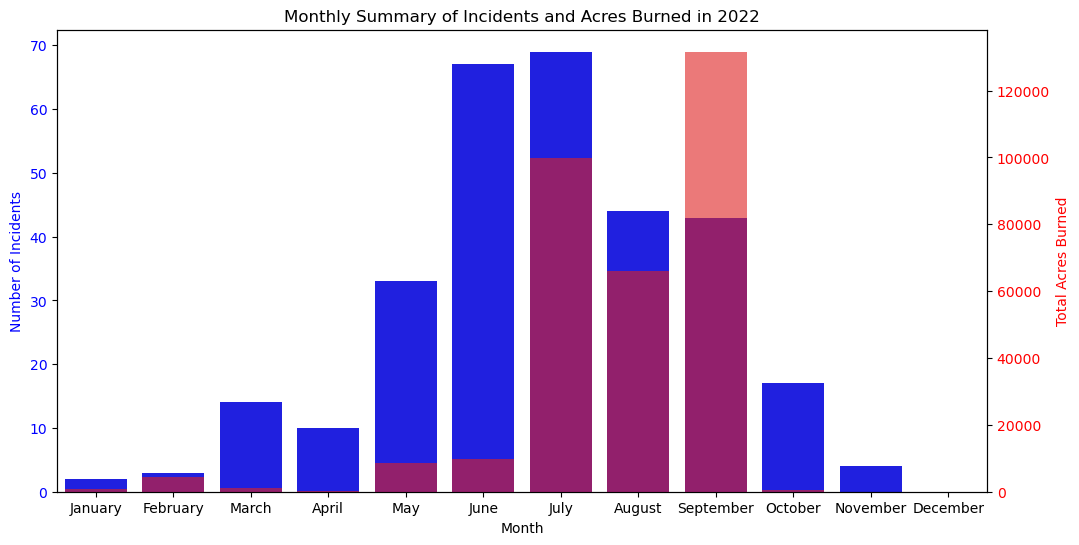

In [5]:
# Plotting a grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Incidents
sns.barplot(data=monthly_summary_2022, x='Month', y='Number of Incidents', color='b', ax=ax1)
ax1.set_ylabel('Number of Incidents', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot Total Acres Burned
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary_2022, x='Month', y='Total Acres Burned', color='r', alpha=0.6, ax=ax2)
ax2.set_ylabel('Total Acres Burned', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Summary of Incidents and Acres Burned in 2022')
plt.show()